In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_palette("Set2")

In [2]:
df = pd.read_excel('Delivery Data Project.xlsx')

In [3]:
df.head()

,order_id,order_number,created_at,fenix_promised_date,Carrier_Pickup_Date,Actual Days to Ship,actual_delivery_date,processed_at,ship_to_zip,processing_method,...,total_price,total_weight,track_id,carrier,carrier_expected_delivery_date,from_zip_code,quantity,service_code,service_desc,status
0,805537710167,128476,2018-12-28 20:59:18,NaT,2019-01-02 17:15:00,4.844236,2019-01-04 11:17:00,2018-12-28 20:59:18,28144,direct,...,36.90,453,784762388808,FEDEX,2019-02-17 00:58:27,NaN,1,FEDEX_2_DAY,FedEx 2Day,DELIVERED
1,805607735383,128477,2018-12-28 23:15:48,2019-01-07,2019-01-02 17:15:00,4.749444,2019-01-04 13:49:00,2018-12-28 23:15:47,76401,express,...,38.00,1587,784762464001,FEDEX,2019-02-17 00:58:25,NaN,1,FEDEX_2_DAY,FedEx 2Day,DELIVERED
2,805616844887,128478,2018-12-28 23:41:04,2019-01-07,2019-01-02 22:22:00,4.945093,2019-01-05 12:41:00,2018-12-28 23:41:03,78380,direct,...,42.00,2041,9405511699000085056254,USPS,2019-02-17 00:12:37,98264.0,0,PM,Priority Mail,DELIVERED
3,805680939095,128479,2018-12-29 01:48:56,NaT,2019-01-02 17:15:00,4.643102,2019-01-08 05:28:00,2018-12-29 01:48:56,5256301,direct,...,74.99,907,784762298714,FEDEX,2019-02-17 00:58:24,NaN,1,INTERNATIONAL_ECONOMY,FedEx International Economy,DELIVERED
4,805769412695,128480,2018-12-29 03:34:53,2019-01-09,2019-01-04 17:29:00,6.579248,2019-01-14 10:11:00,2018-12-29 03:34:52,33586,direct,...,157.05,3401,61290985613820000953,FEDEX,2019-02-17 00:58:22,NaN,1,SMART_POST,FedEx SmartPost,DELIVERED


In [4]:
df.shape

(1524, 27)

In [5]:
df.describe()

,order_id,order_number,Actual Days to Ship,shipping_price,sub_total_price,total_line_items_price,total_discout,total_price,total_weight,from_zip_code,quantity
count,1.524000e+03,1524.000000,1524.000000,1520.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,4.490000e+02,1524.000000
mean,8.348575e+11,129278.967192,-1596.436700,8.384329,109.806673,119.974547,18.861850,109.806673,2965.337927,1.864342e+07,0.723097
std,1.732766e+10,465.247130,8185.737403,15.697430,175.285006,202.104911,61.068876,175.285006,7876.509622,1.288656e+08,0.498946
min,8.055377e+11,128476.000000,-43512.768183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.123000e+03,0.000000
25%,8.194779e+11,128877.750000,0.459175,0.000000,24.037500,20.000000,0.000000,24.037500,408.000000,9.826400e+04,0.000000
50%,8.338779e+11,129275.500000,1.081215,6.950000,60.200000,59.950000,0.000000,60.200000,1360.000000,9.826400e+04,1.000000
75%,8.502594e+11,129682.250000,2.085616,9.000000,132.125000,152.900000,10.000000,132.125000,3063.250000,9.826400e+04,1.000000
max,8.663718e+11,130093.000000,44.186782,240.000000,3592.800000,4272.000000,1098.000000,3592.800000,125191.000000,9.826419e+08,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 27 columns):
order_id                          1524 non-null int64
order_number                      1524 non-null int64
created_at                        1524 non-null datetime64[ns]
fenix_promised_date               650 non-null datetime64[ns]
Carrier_Pickup_Date               1468 non-null datetime64[ns]
Actual Days to Ship               1524 non-null float64
actual_delivery_date              1419 non-null datetime64[ns]
processed_at                      1524 non-null datetime64[ns]
ship_to_zip                       1519 non-null object
processing_method                 1499 non-null object
shipping_source                   1495 non-null object
shipping_title                    1520 non-null object
shipping_code                     1520 non-null object
shipping_price                    1520 non-null float64
sub_total_price                   1524 non-null float64
total_line_items_price      

###  1.) What percentage of shipments/orders were delivered late/early (by how many days) and if the shipping estimate was provided by Fenix? Note that when a customer choose fenix provides estimates, you'll see an estimated delivery date in the shipping option.

In [7]:
fenix_commerce_df = df[df['shipping_source'] == 'Fennix Commerce']

In [8]:
fenix_deliver_estimate = (fenix_commerce_df['actual_delivery_date'] - fenix_commerce_df['fenix_promised_date']).dt.days

In [9]:
fenix_deliver_estimate.value_counts()

 0.0      152
-1.0      108
-2.0      107
-3.0       69
-4.0       49
 1.0       40
-5.0       32
 2.0       14
-6.0       11
 4.0        8
 3.0        8
 5.0        4
 9.0        3
 6.0        2
 10.0       2
 14.0       2
 11.0       1
 26.0       1
 13.0       1
 7.0        1
 8.0        1
-342.0      1
dtype: int64

In [10]:
sum(fenix_deliver_estimate.value_counts())

617

**From this table we can see that fenix commerce has mostly got the estimated delivery date correct. And if not, it has has predicted late delivery by 1, 2, 3 and 4 days so there is a buffer.**

In [11]:
incorrect_estimate = (sum(fenix_deliver_estimate.value_counts()) - 
                      fenix_deliver_estimate.value_counts()[0])
incorrect_estimate

465

**Number of days prediceted early / late : 465 days**

In [12]:
percent_incorrect_estimate = incorrect_estimate / sum(fenix_deliver_estimate.value_counts())  * 100
percent_correct_estimate = 100 - percent_incorrect_estimate
percent_incorrect_estimate

75.3646677471637

**Percent of days predicted early / late : 75.36%**

In [13]:
delivery_estimate_df = pd.DataFrame({'estimate' : ['Correct', 'Incorrect'],
                                 'estimate_percent': [percent_correct_estimate,
                                                      percent_incorrect_estimate]})

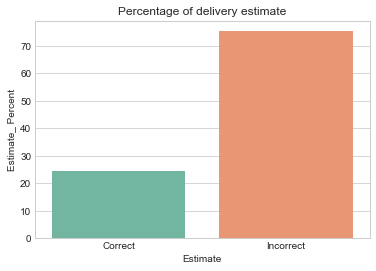

In [14]:
ax = sns.barplot(x="estimate",y="estimate_percent", data = delivery_estimate_df)
ax.set(xlabel='Estimate', ylabel='Estimate_ Percent')
ax.set_title("Percentage of delivery estimate")
plt.show()

### 2 What percentage of shipments/orders were shipped late/early (by how many days) and if the shipping estimate was provided by Fenix? Note that when a customer choose fenix provides estimates, you'll see an estimated delivery date in the shipping option.

In [15]:
df.columns

Index(['order_id', 'order_number', 'created_at', 'fenix_promised_date',
       'Carrier_Pickup_Date', 'Actual Days to Ship', 'actual_delivery_date',
       'processed_at', 'ship_to_zip', 'processing_method', 'shipping_source',
       'shipping_title', 'shipping_code', 'shipping_price', 'sub_total_price',
       'total_line_items_price', 'total_discout', 'total_price',
       'total_weight', 'track_id', 'carrier', 'carrier_expected_delivery_date',
       'from_zip_code', 'quantity', 'service_code', 'service_desc', 'status'],
      dtype='object')

#### From the above data columns we see that, <br>Actual Shipping date and Estimated shipping date are not provided we cannot determine the percent of late/early shipping estimate

In [16]:
df['Actual Days to Ship'].astype('int').value_counts()

 0        622
 1        435
 2        209
 3         98
 4         35
 5         10
 6          9
-43506      7
 14         6
-43505      6
-43512      5
 13         5
 7          4
 10         4
 11         4
-43504      3
 8          3
 15         3
-43480      3
-43511      3
-43469      2
 27         2
-43463      2
 18         2
-43477      2
-43471      2
 9          2
-43475      2
-43481      2
-43493      2
-43507      2
 24         2
 12         1
 23         1
 16         1
 17         1
 20         1
-1          1
-27         1
 28         1
-43510      1
-43509      1
-43503      1
-43501      1
-43494      1
-43485      1
-43483      1
-43482      1
-43474      1
-43473      1
-43472      1
-43468      1
-43465      1
-47         1
 36         1
 34         1
 29         1
 44         1
Name: Actual Days to Ship, dtype: int64

**However from the Actual days to ship we see lot of anomalous data. Graph in additional insights**

### 3.) What the % orders were split between fenix and non-fenix shipping options?

In [17]:
def percent(x, y):
    
    # This function takes two values and returns their percentage
    percent_x = x / y * 100
    percent_y = 100 - percent_x
    return percent_x, percent_y

In [18]:
df['shipping_source'].value_counts()

shopify                   702
Fennix Commerce           650
Iglobal Shipping Rates     94
fedex                      36
usps                       13
Name: shipping_source, dtype: int64

**From the above table we can see that Fenix Commerce was 2nd most used shipping method by customers. **

In [19]:
fennix_percent, others_percent = percent(df['shipping_source'].value_counts()[1], 
                                         sum(df['shipping_source'].value_counts()))

In [20]:
# Creating a dataframe to have shipping source related statistics and information

orders_percent_df = pd.DataFrame({'order_option' : ['Fennix Commerce', 'Others'],
                                 'shipping_percent': [fennix_percent, others_percent]})

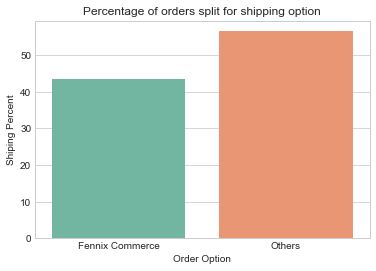

In [21]:
ax = sns.barplot(x="order_option",y="shipping_percent", data = orders_percent_df)
ax.set(xlabel='Order Option', ylabel='Shiping Percent')
ax.set_title("Percentage of orders split for shipping option")
plt.show()

**From the above graph we can see that the split for shipping for Fenix commerce is ~43% and non Fenix is ~57%.**

### 4.)What was the % of free vs. paid shipping (when customer paid for shipping) for fenix vs. non-fenix shipping options and also total amount of shipping amount (across all orders) was paid for fenix vs. non-fenix options orders?

In [22]:
(df['shipping_price'] < 0).any()

False

In [23]:
def cost(price):
    if price == 0:
        return 'Free'
    elif price > 0:
        return 'Paid'
    else:
        return 'Null'

In [24]:
df['shipping_cost'] = df['shipping_price'].apply(cost)

In [25]:
df_ship_fenix = df.loc[df['shipping_source'] == 'Fennix Commerce']
df_ship_others = df.loc[df['shipping_source'] != 'Fennix Commerce']

In [26]:
df_ship_fenix['shipping_cost'].value_counts()

Paid    405
Free    245
Name: shipping_cost, dtype: int64

In [27]:
df_ship_others['shipping_cost'].value_counts()

Paid    606
Free    264
Null      4
Name: shipping_cost, dtype: int64

In [28]:
fenix_paid_percent, fenix_free_percent = percent(df_ship_fenix['shipping_cost'].value_counts()[0],
                                                 sum(df_ship_fenix['shipping_cost'].value_counts()))

In [29]:
others_paid_percent, others_free_percent = percent(df_ship_others['shipping_cost'].value_counts()[0],
                                                   (df_ship_others['shipping_cost'].value_counts()[0] + \
                                                    df_ship_others['shipping_cost'].value_counts()[1]))


In [30]:
orders_percent_df['shipping_cost'] = ['Paid', 'Free']
orders_percent_df['fenix_shipping_cost'] = [fenix_paid_percent, fenix_free_percent]
orders_percent_df['others_shipping_cost'] = [others_paid_percent, others_free_percent]

In [31]:
orders_percent_df

,order_option,shipping_percent,shipping_cost,fenix_shipping_cost,others_shipping_cost
0,Fennix Commerce,43.478261,Paid,62.307692,69.655172
1,Others,56.521739,Free,37.692308,30.344828


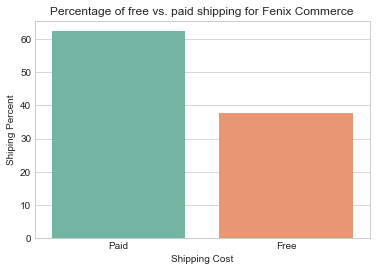

In [32]:
ax = sns.barplot(x="shipping_cost",y="fenix_shipping_cost", data = orders_percent_df)
ax.set(xlabel='Shipping Cost', ylabel='Shiping Percent')
ax.set_title("Percentage of free vs. paid shipping for Fenix Commerce")
plt.show()

**From the above graph we can see that, for Fenix Commerce the paid shipping price percent is ~62% and unpaid shipping price percent is ~38%.**

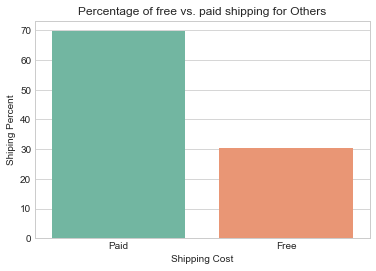

In [33]:
ax = sns.barplot(x="shipping_cost",y="others_shipping_cost", data = orders_percent_df)
ax.set(xlabel='Shipping Cost', ylabel='Shiping Percent')
ax.set_title("Percentage of free vs. paid shipping for Others")
plt.show()

**From the above graph we can see that, for no Fenix shipping options the paid shipping price percent is ~70% and unpaid shipping price percent is ~30%.**

In [34]:
def shipping_source(source):
    
    if source == 'Fennix Commerce':
        return 'Fennix Commerce'
    else:
        return 'Others'

In [35]:
df['shipping_source_modified'] = df['shipping_source'].apply(shipping_source)

In [36]:
total_fenix_shipping_price = df[df['shipping_source_modified'] == 'Fennix Commerce']['shipping_price'].sum()
total_others_shipping_price = df[df['shipping_source_modified'] == 'Others']['shipping_price'].sum()

In [37]:
orders_percent_df = pd.DataFrame({'shipping_option' : ['Fennix Commerce', 'Others'],
                                 'shipping_price': [total_fenix_shipping_price, total_others_shipping_price]})

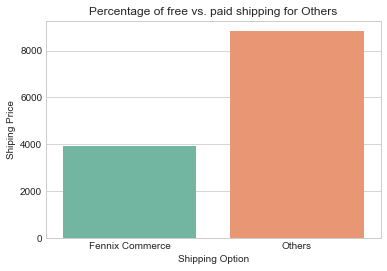

In [38]:
ax = sns.barplot(x="shipping_option",y="shipping_price", data = orders_percent_df)
ax.set(xlabel='Shipping Option', ylabel='Shiping Price')
ax.set_title("Percentage of free vs. paid shipping for Others")
plt.show()

**From the above graph, we can see that total shipping price for Fenix Commerce is ~ 3900 and for Others is ~ 8800.**

### Additional Insights

#### Checking the total null values in a dataframe

In [39]:
df.isna().sum()

order_id                             0
order_number                         0
created_at                           0
fenix_promised_date                874
Carrier_Pickup_Date                 56
Actual Days to Ship                  0
actual_delivery_date               105
processed_at                         0
ship_to_zip                          5
processing_method                   25
shipping_source                     29
shipping_title                       4
shipping_code                        4
shipping_price                       4
sub_total_price                      0
total_line_items_price               0
total_discout                        0
total_price                          0
total_weight                         0
track_id                             0
carrier                              0
carrier_expected_delivery_date       0
from_zip_code                     1075
quantity                             0
service_code                         7
service_desc             

**Few of the columns have Null Values**

#### Checking if the Order Id has duplicate values

In [40]:
df['order_id'].nunique()

1509

**Few of the orders are duplicated**

In [41]:
duplicate_order_id = df[df.duplicated(subset=['order_id'],keep=False)].head()
duplicate_order_id.head()

,order_id,order_number,created_at,fenix_promised_date,Carrier_Pickup_Date,Actual Days to Ship,actual_delivery_date,processed_at,ship_to_zip,processing_method,...,track_id,carrier,carrier_expected_delivery_date,from_zip_code,quantity,service_code,service_desc,status,shipping_cost,shipping_source_modified
127,810977001559,128609,2019-01-02 14:51:34,2019-01-10,2019-01-03 16:36:00,1.072523,2019-01-09 12:14:09,2019-01-02 14:51:34,29928,direct,...,784783063068,FEDEX,2019-02-17 00:55:54,NaN,1,GROUND_HOME_DELIVERY,FedEx Home Delivery,DELIVERED,Free,Fennix Commerce
128,810977001559,128609,2019-01-02 14:51:34,2019-01-10,2019-01-16 22:44:00,14.328079,2019-01-19 16:41:00,2019-01-02 14:51:34,29928,direct,...,9405511699000699708044,USPS,2019-02-17 00:12:09,98264.0,0,PM,Priority Mail,DELIVERED,Free,Fennix Commerce
258,815745630295,128746,2019-01-06 14:13:40,2019-01-11,2019-01-17 17:05:00,11.118981,2019-01-21 09:40:00,2019-01-06 14:13:39,45174,express,...,785032926903,FEDEX,2019-02-17 00:48:06,NaN,1,FEDEX_2_DAY,FedEx 2Day,DELIVERED,Paid,Fennix Commerce
259,815745630295,128746,2019-01-06 14:13:40,2019-01-11,2019-01-09 20:12:00,3.248843,2019-01-11 15:09:00,2019-01-06 14:13:39,45174,express,...,9400111699000070102734,USPS,2019-02-17 00:11:27,98264.0,0,FC,First-Class Package Service,DELIVERED,Paid,Fennix Commerce
264,815940534359,128751,2019-01-06 17:56:25,2019-01-10,2019-01-07 16:41:00,0.947627,2019-01-09 16:02:00,2019-01-06 17:56:25,94928-1504,express,...,784844093445,FEDEX,2019-02-17 00:48:03,NaN,1,FEDEX_2_DAY,FedEx 2Day,DELIVERED,Free,Fennix Commerce


In [42]:
df['order_number'].nunique()

1509

**Repeated order_id have same order_number but rest of the values can be different**

C:\Users\sanji\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


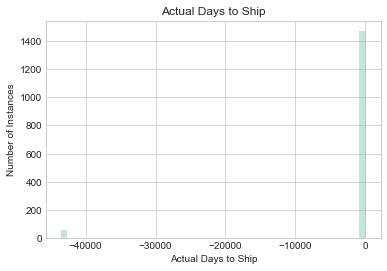

In [43]:
ax = sns.distplot(df['Actual Days to Ship'], kde = False, norm_hist = False, label = "default")
ax.set(xlabel='Actual Days to Ship', ylabel='Number of Instances')
ax.set_title("Actual Days to Ship")
plt.show()

From the above graph we can that few of the Actual Days to ships are negative

C:\Users\sanji\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


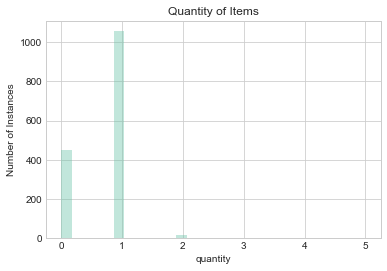

In [44]:
ax = sns.distplot(df['quantity'], kde = False, norm_hist = False, label = "default")
ax.set(xlabel='quantity', ylabel='Number of Instances')
ax.set_title("Quantity of Items")
plt.show()

C:\Users\sanji\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


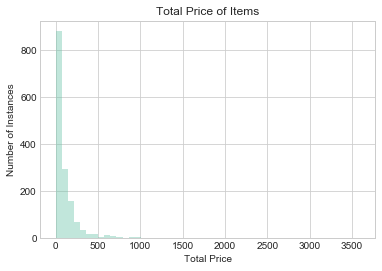

In [45]:
ax = sns.distplot(df['total_price'], kde = False, norm_hist = False, label = "default")
ax.set(xlabel='Total Price', ylabel='Number of Instances')
ax.set_title("Total Price of Items")
plt.show()

C:\Users\sanji\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


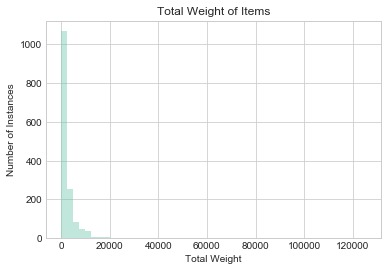

In [46]:
ax = sns.distplot(df['total_weight'], kde = False, norm_hist = False, label = "default")
ax.set(xlabel='Total Weight', ylabel='Number of Instances')
ax.set_title("Total Weight of Items")
plt.show()

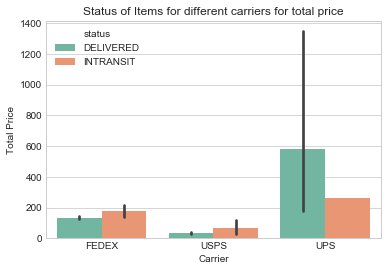

In [47]:
ax = sns.barplot(x="carrier",y="total_price", hue='status', data = df)
ax.set(xlabel='Carrier', ylabel='Total Price')
ax.set_title("Status of Items for different carriers for total price")
plt.show()

**UPS had has most priced items in delivered status. Also we can see that for costly items UPS is preferred, then FEDEX and USPS**

In [48]:
df['carrier_expected_delivery_date'] = pd.to_datetime(df['carrier_expected_delivery_date'])
df['carrier_expected_delivery_date'].dt.date.unique()

array([datetime.date(2019, 2, 17)], dtype=object)

In [49]:
df['carrier_expected_delivery_date'].dt.date.unique()

array([datetime.date(2019, 2, 17)], dtype=object)

**The carrier expected delivery data is in the month of February for all orders.**